# Importing the Dependencies

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Dataset Collection 

Dataset link: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [27]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv("diabetes.csv")

# printing the first 15 rows of the dataset
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# number of rows and Columns in this dataset
df.shape

(768, 9)

# Exploratory Analysis and Pre-processing

Informations on the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
# analysing the dependent column
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 -> Non Diabetic 

1 -> Diabetic

Checking for missing values

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Transformation of null values into 'nan'

In [8]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[col] = df[col].replace(0,np.nan)
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Replacing the nan with their median value based on their Outcome class

In [10]:
for it in col:
    med_0,med_1 = df.groupby('Outcome')[it].median()
    for i in df['Outcome']:
        if i == 0:
            df[it] = df[it].fillna(med_0)
        else:
            df[it] = df[it].fillna(med_1)
    
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Separating the data and labels

In [12]:
X = df.iloc[:,:-1]
Y = df.Outcome

# Data Standardization

In [13]:
scaler =  StandardScaler()
scaler.fit_transform(X)

array([[ 0.63994726,  0.86018036, -0.04138857, ...,  0.1623683 ,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20866522, -0.53740553, ..., -0.8559378 ,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.00953901, -0.70274451, ..., -1.33599639,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02646775, -0.04138857, ..., -0.91412672,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.13772635, -1.03342249, ..., -0.34678475,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94595467, -0.20672755, ..., -0.30314306,
        -0.47378505, -0.87137393]])

# Correlation

In [14]:
df.corr().style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126547,0.207879,0.104428,0.069758,0.021627,-0.033523,0.544341,0.221898
Glucose,0.126547,1.000000,0.215376,0.196002,0.414687,0.228584,0.135815,0.264676,0.492770
BloodPressure,0.207879,0.215376,1.000000,0.209662,0.085038,0.281826,-0.004751,0.322686,0.167757
SkinThickness,0.104428,0.196002,0.209662,1.000000,0.164311,0.522110,0.077395,0.158825,0.220678
Insulin,0.069758,0.414687,0.085038,0.164311,1.000000,0.158443,0.084695,0.153608,0.217041
BMI,0.021627,0.228584,0.281826,0.522110,0.158443,1.000000,0.152875,0.024596,0.310420
DiabetesPedigreeFunction,-0.033523,0.135815,-0.004751,0.077395,0.084695,0.152875,1.000000,0.033561,0.173844
Age,0.544341,0.264676,0.322686,0.158825,0.153608,0.024596,0.033561,1.000000,0.238356
Outcome,0.221898,0.492770,0.167757,0.220678,0.217041,0.310420,0.173844,0.238356,1.000000


# Train and Test data spliting

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3,random_state=5)

# Modeling

**SVC**

In [16]:
svc_model = svm.SVC(kernel='linear')

In [17]:
svc_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [18]:
X_test_prediction = svc_model.predict(X_test)
svc_acc = accuracy_score(X_test_prediction, Y_test)
svc_acc

0.7965367965367965

In [19]:
confusion_matrix(Y_test,X_test_prediction)

array([[135,  25],
       [ 22,  49]], dtype=int64)

**Logistic Regression**

In [20]:
logistic_model = LogisticRegression(max_iter=1000)

In [21]:
logistic_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [22]:
X_test_prediction = logistic_model.predict(X_test)
logistic_acc = accuracy_score(X_test_prediction, Y_test)
logistic_acc

0.8008658008658008

In [23]:
confusion_matrix(Y_test,X_test_prediction)

array([[135,  25],
       [ 21,  50]], dtype=int64)

# Accuracy Comparision

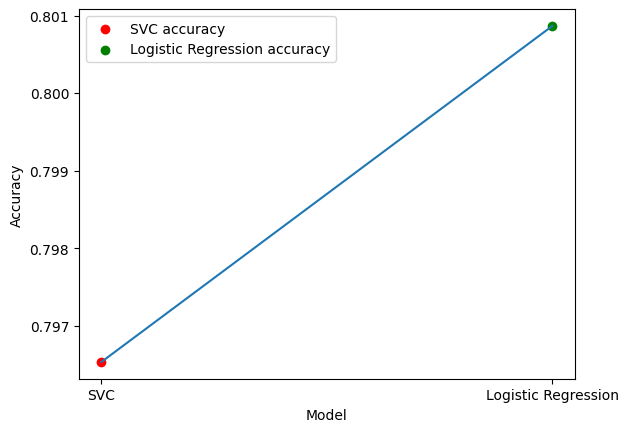

In [24]:
plt.plot(['SVC','Logistic Regression'],[svc_acc,logistic_acc])
plt.scatter('SVC',svc_acc,marker='o',color='red',label='SVC accuracy')
plt.scatter('Logistic Regression',logistic_acc,marker='o',color='green',label='Logistic Regression accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()